In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [7]:
df = pd.read_excel(os.path.join( "Resources", "combined-feat-sales_v2.xlsx"))
df.head()

,Axander-Model,id,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,BMW 7-series,272,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,BMW 7-series,273,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,BMW 7-series,274,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,BMW 7-series,275,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,BMW 7-series,276,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909


In [8]:

df_model = df.drop(['Axander-Model','id','displ','cyl'],axis = 1)
df_model.head()

,year,model,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,BMW 740i,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,2016,BMW 740i,Gasoline,large car,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,2016,BMW 750i,Gasoline,large car,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,2016,BMW 750i,Gasoline,large car,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,2016,BMW 750i,Gasoline,large car,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909


In [9]:
# Use Pandas get_dummies to convert categorical data
comp_df = df[['year', 'model', 'fuel_type', 'vehicle_class', 'trans',
       'drive', 'smog_rating', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'Greenhouse_gas_score', 'smartway', 'comb_CO2', 'Sales_2016',
       'Sales_2017', 'Sales_2018']]
### BEGIN SOLUTION
comp_df = pd.get_dummies(comp_df)
comp_df.head()

,year,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,comb_CO2,Sales_2016,Sales_2017,Sales_2018,...,trans_Man-5,trans_Man-6,trans_SemiAuto-5,trans_SemiAuto-6,trans_SemiAuto-8,drive_2WD,drive_4WD,smartway_Elite,smartway_No,smartway_Yes
0,2016,6,21.0,29.0,24.0,5,371.0,12071,8731,7909,...,0,0,0,0,1,1,0,0,1,0
1,2016,6,21.0,29.0,24.0,5,371.0,12071,8731,7909,...,0,0,0,0,1,1,0,0,1,0
2,2016,5,17.0,25.0,20.0,4,436.0,12071,8731,7909,...,0,0,0,0,1,1,0,0,1,0
3,2016,6,17.0,25.0,20.0,4,436.0,12071,8731,7909,...,0,0,0,0,1,1,0,0,1,0
4,2016,5,16.0,25.0,19.0,4,459.0,12071,8731,7909,...,0,0,0,0,1,0,1,0,1,0


In [11]:
# Assign X (data) and y (target)

X = comp_df[['year', 'smog_rating', 
       'Greenhouse_gas_score', 'comb_CO2', 'Sales_2016', 'Sales_2017',
       'Sales_2018', 'model_BMW 740e', 'model_BMW 740i', 'model_BMW 750i',
       'model_CHEVROLET Colorado', 'model_CHEVROLET Colorado ZR2',
       'model_CHEVROLET Silverado 15', 'model_FIAT 500',
       'model_FIAT 500 Abarth', 'model_FIAT 500L', 'model_FIAT 500X',
       'model_FIAT 500e', 'model_GMC Canyon', 'model_GMC Sierra 15',
       'model_HONDA Ridgeline', 'model_JAGUAR XJ', 'model_JEEP Wrangler',
       'model_JEEP Wrangler Unlimited', 'model_NISSAN Leaf',
       'model_SMART ForTwo ed', 'model_TOYOTA 4Runner', 'model_TOYOTA Tacoma',
       'model_TOYOTA Tundra', 'fuel_type_Diesel', 'fuel_type_Electricity',
       'fuel_type_Ethanol/Gas', 'fuel_type_Gasoline',
       'fuel_type_Gasoline/Electricity', 'vehicle_class_large car',
       'vehicle_class_midsize car', 'vehicle_class_pickup',
       'vehicle_class_small SUV', 'vehicle_class_small car',
       'vehicle_class_special purpose', 'vehicle_class_standard SUV',
       'vehicle_class_station wagon', 'trans_Auto-1', 'trans_Auto-5',
       'trans_Auto-6', 'trans_Auto-8', 'trans_Auto-9', 'trans_Man-5',
       'trans_Man-6', 'trans_SemiAuto-5', 'trans_SemiAuto-6',
       'trans_SemiAuto-8', 'drive_2WD', 'drive_4WD', 'smartway_Elite',
       'smartway_No', 'smartway_Yes']]
y = comp_df['cmb_mpg'].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(510, 57) (510, 1)


In [12]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION


In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [15]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

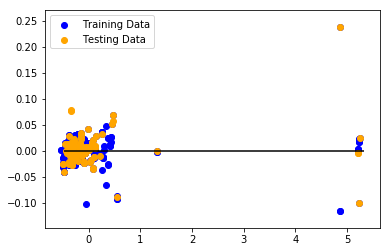

In [18]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())

plt.show()
### END SOLUTION

In [17]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0009772636259145135, R2: 0.9991190871879094


In [20]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11765429708420214, R2: 0.862401724821697


In [21]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.11797633698958421, R2: 0.8620250948420248
